In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

df = pd.read_excel('drive/MyDrive/twitter_info_total_final_1.xlsx',dtype=object)

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,names,firstnames,twitter names,location,followed,following,favorite_count,listed_count,statused_count,description,tweet 0,tweet 1,tweet 2,tweet 3,tweet 4,tweet 5,tweet 6,tweet 7,tweet 8,tweet 9,tweet 10,tweet 11,tweet 12,tweet 13,tweet 14,tweet 15,tweet 16,tweet 17,tweet 18,tweet 19
0,0,0,Fassbender,Klaus,Klaustrofobo,Chile,16,11,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,Jahn,Holger,agile_worker,"Hambourg, Allemagne",84,9,16,0,3,"Agile Worker, #agilethatpays",Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,Lauer,Martin,MartinLauer,"Hull,. East Yorkshire",1840,1873,174,33,1340,"MD of @TheOnePoint - IT,Telecoms,Mobile & Digi...",Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...
3,3,3,Muche,Rainer,rstropek,Austria,419,1834,867,103,1298,"Software developer, entrepreneur, likes his bi...",Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...
4,4,4,Schneider,Anja,anjaschneider,"Berlin, Allemagne",87,47204,16,630,3647,"Anja Schneider is DJ, producer, radio broadcas...",Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.ap

In [ ]:
df=df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [ ]:
df1 = pd.read_csv('drive/MyDrive/finucla3.csv')

In [ ]:
# df1=df1.drop(['Unnamed: 0'],axis=1)
df.shape

(8376, 30)

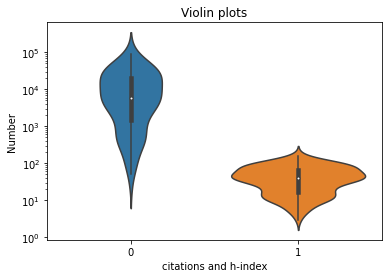

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import ticker as mticker
import numpy as np
import math as m
import seaborn as sns

data=[df1['0'],df1['1']]
log_data = [[np.log10(d+1) for d in row] for row in data]

fig, ax = plt.subplots(1, 1)
sns.violinplot(data=log_data)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
ax.yaxis.set_ticks([np.log10(x) for p in range(1,5) for x in np.linspace(10**p, 10**(p+1), 10)], minor=True)
plt.ylabel('Number')
plt.xlabel('citations and h-index')
plt.title('Violin plots')
plt.show()

In [ ]:
df.head()

,names,firstnames,twitter names,location,followed,following,favorite_count,listed_count,statused_count,description,tweet 0,tweet 1,tweet 2,tweet 3,tweet 4,tweet 5,tweet 6,tweet 7,tweet 8,tweet 9,tweet 10,tweet 11,tweet 12,tweet 13,tweet 14,tweet 15,tweet 16,tweet 17,tweet 18,tweet 19
0,Fassbender,Klaus,Klaustrofobo,Chile,16,11,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jahn,Holger,agile_worker,"Hambourg, Allemagne",84,9,16,0,3,"Agile Worker, #agilethatpays",Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Lauer,Martin,MartinLauer,"Hull,. East Yorkshire",1840,1873,174,33,1340,"MD of @TheOnePoint - IT,Telecoms,Mobile & Digi...",Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...
3,Muche,Rainer,rstropek,Austria,419,1834,867,103,1298,"Software developer, entrepreneur, likes his bi...",Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...
4,Schneider,Anja,anjaschneider,"Berlin, Allemagne",87,47204,16,630,3647,"Anja Schneider is DJ, producer, radio broadcas...",Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<tweepy.api.API object at 0x117e93...,Status(_api=<twe

In [ ]:
df['description'][0]

nan

In [ ]:
df = df.drop(["tweet 0","tweet 1","tweet 2","tweet 3","tweet 4"],axis=1)
df = df.drop(["tweet 5","tweet 6","tweet 7","tweet 8","tweet 9"],axis=1)
df = df.drop(["tweet 10","tweet 11","tweet 12","tweet 13","tweet 14"],axis=1)
df = df.drop(["tweet 15","tweet 16","tweet 17","tweet 18","tweet 19"],axis=1)
df.head(10)

,names,firstnames,twitter names,location,followed,following,favorite_count,listed_count,statused_count,description
0,Fassbender,Klaus,Klaustrofobo,Chile,16,11,0,0,0,NaN
1,Jahn,Holger,agile_worker,"Hambourg, Allemagne",84,9,16,0,3,"Agile Worker, #agilethatpays"
2,Lauer,Martin,MartinLauer,"Hull,. East Yorkshire",1840,1873,174,33,1340,"MD of @TheOnePoint - IT,Telecoms,Mobile & Digi..."
3,Muche,Rainer,rstropek,Austria,419,1834,867,103,1298,"Software developer, entrepreneur, likes his bi..."
4,Schneider,Anja,anjaschneider,"Berlin, Allemagne",87,47204,16,630,3647,"Anja Schneider is DJ, producer, radio broadcas..."
5,Schroeter,Matthias L.,gran_stat_mech,Göttingen,138,183,365,10,467,"pattern formation, minimal music, granular mat..."
6,Otto,Markus,Murkusotto,"Gothenburg, Sweden",400,186,436,1,389,•Förvirrad tekniktonåring\n•Liberal
7,Ridha,Basil H.,RidhaLoukil,NaN,28,130,0,7,1553,NaN
8,Cutler,Dawn,DawnCutler4,"Camperdown, Sydney",37,17,26,0,8,NaN
9,Frost,Christopher,chrisfrostmusic,NaN,174,93,455,2,741,"Musical composition, production, and performan..."


In [ ]:
c=0
df['followed']=df['followed'].fillna(df['followed'].mean())
df['following']=df['following'].fillna(df['following'].mean())
df.isnull().sum()

names                0
firstnames           0
twitter names        0
location          3727
followed             0
following            0
favorite_count     969
listed_count       970
statused_count     970
description       3297
dtype: int64

In [ ]:
df.sort_values(by=['followed'],ascending=False).head(5)

,names,firstnames,twitter names,location,followed,following,favorite_count,listed_count,statused_count,description
6540,Baranowski,David C,DFBHarvard,USA,153551.0,153625.0,90387,281,63164,"Was on Ark with Noah! #MAGA, #Harvard, #Conser..."
2104,Tucker,John A,Johntucker990,"Los Angeles, CA",95823.0,91285.0,70756,423,268588,Celebrity Photographer 📸 Party Host / Event pl...
7061,van Hemmen,Leo J,LeoAuteur,France,48520.0,149748.0,6107,1115,31963,Dépeindre les fonds abyssaux pour encourager l...
3800,Hogan,David B,WaveDaveHogan,La Jolla & Skopelos,36662.0,38825.0,771,430,2895,Author:\nThe Last Island\nfrom Betimes Books
3905,Fontana,Walter,WalterFontanaof,"Padoue, Vénétie",36036.0,59939.0,2669,86,5882,Sono un cantante tutto sommato. https://t.co/0...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


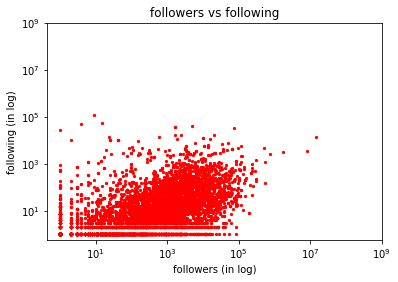

In [ ]:
import matplotlib.pyplot as plt
import math as m

fing=[]
foler=[]

for i in range(df.shape[0]):
    fing.append(df.iat[i,6]+1)
    foler.append(df.iat[i,7]+1)

fig=plt.figure()
ax=plt.gca()
ax.scatter(fing,foler,s=5,c='r')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim([0,pow(10,9)])
ax.set_xlim([0,pow(10,9)])
plt.title('followers vs following')
plt.xlabel('followers (in log)')
plt.ylabel('following (in log)')
plt.show()
    

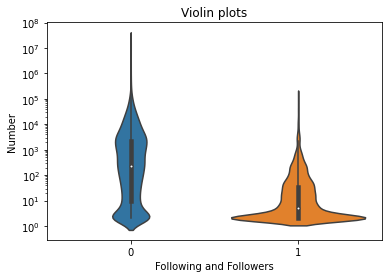

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import ticker as mticker
import numpy as np
import math as m
import seaborn as sns

data=[fing,foler]
log_data = [[np.log10(d+1) for d in row] for row in data]

fig, ax = plt.subplots(1, 1)
sns.violinplot(data=log_data)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
ax.yaxis.set_ticks([np.log10(x) for p in range(1,5) for x in np.linspace(10**p, 10**(p+1), 10)], minor=True)
plt.ylabel('Number')
plt.xlabel('Following and Followers')
plt.title('Violin plots')
plt.show()

In [ ]:
df1.shape[0]

140

In [ ]:
fi=[]

for i in df1['2']:
    for j in range(df.shape[0]):
        if((str(df['firstnames'][j])+' '+str(df['names'][j]))==i):
            fi.append(df['followed'][j])
            break
print(len(fi))

140


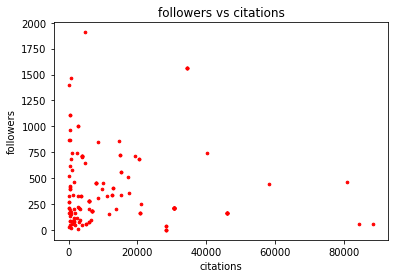

In [ ]:
fig=plt.figure()
ax=plt.gca()
ax.scatter(df1['0'],fi,s=7,c='r')
plt.xlabel('citations')
plt.ylabel('followers')
plt.title('followers vs citations')
# ax.set_yscale('log')
# ax.set_xscale('log')
plt.show()

In [ ]:
df1['0'].mean()

13642.728571428572

In [ ]:
df1['0'].std()

17360.11037073411

In [ ]:
from scipy.stats import pearsonr

corr, _ = pearsonr(df1['0'], fi)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.062


In [ ]:
from scipy.stats import ttest_ind

res = ttest_ind(df1['0'], fi).pvalue

print(res)

2.999505631251634e-17


In [ ]:
df1['followers'] = np.array(fi)

In [ ]:
df1=df1.rename(columns={"Unnamed: 0": "S.no.", "0": "citations", "1":"h-index", "2":"name"})
df1.head()

,S.no.,citations,h-index,name,followers
0,0,1448,20,Andrea Arighi,465.0
1,1,3899,35,Neil M. Davies,699.0
2,2,30587,83,Sebastiaan Engelborghs,213.0
3,3,46051,103,Simon Lovestone,162.0
4,4,114,5,Antonietta Gabriella Liuzzi,210.0


In [ ]:
df1.sort_values(by=['citations'],ascending=False).head(5)

,S.no.,citations,h-index,name,followers
45,45,88609,112,Si Zhang,60.0
99,99,84608,118,Hao Jiang,56.0
56,56,81093,152,Yi Zhang,462.0
46,46,58407,118,Martin Knapp,447.0
96,96,46051,103,Simon Lovestone,162.0


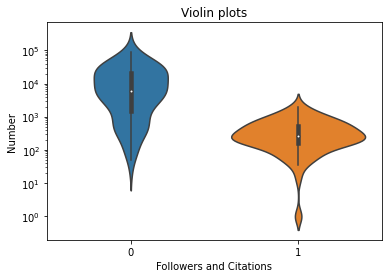

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import ticker as mticker
import numpy as np
import math as m
import seaborn as sns

data=[df1['citations'],fi]
log_data = [[np.log10(d+1) for d in row] for row in data]

fig, ax = plt.subplots(1, 1)
sns.violinplot(data=log_data)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
ax.yaxis.set_ticks([np.log10(x) for p in range(1,5) for x in np.linspace(10**p, 10**(p+1), 10)], minor=True)
plt.ylabel('Number')
plt.xlabel('Followers and Citations')
plt.title('Violin plots')
plt.show()

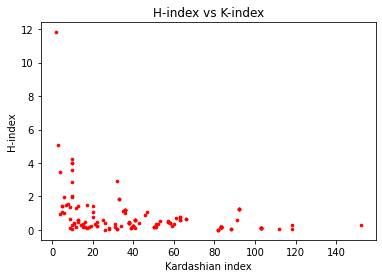

In [ ]:
kar=[]
for i,j in zip(fi,df1['citations']):
    l=43.3*(j**0.32)
    kar.append(i/l)

fig=plt.figure()
ax=plt.gca()
ax.scatter(df1['h-index'],kar,s=7,c='r')
plt.xlabel('Kardashian index')
plt.ylabel('H-index')
plt.title('H-index vs K-index')
# ax.set_yscale('log')
# ax.set_xscale('log')
plt.show()


In [ ]:
df1['k-index'] = np.array(kar)

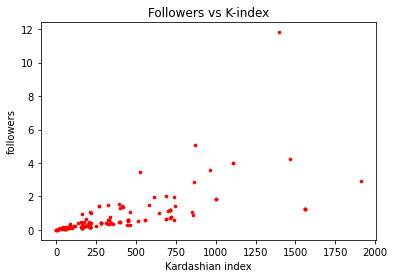

In [ ]:
fig=plt.figure()
ax=plt.gca()
ax.scatter(df1['followers'],df1['k-index'],s=7,c='r')
plt.xlabel('Kardashian index')
plt.ylabel('followers')
plt.title('Followers vs K-index')
# ax.set_yscale('log')
# ax.set_xscale('log')
plt.show()

In [ ]:
from scipy.stats import pearsonr

corr, _ = pearsonr(df1['followers'], df1['k-index'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.642


In [ ]:
from scipy.stats import ttest_ind

res = ttest_ind(df1['followers'], df1['k-index']).pvalue

print(res)

2.5998169078604975e-28


In [ ]:
df1['k-index'].std()

1.305732930935333

C:\Users\Ashis PC\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


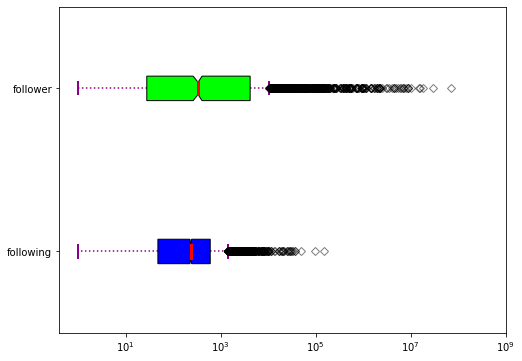

In [ ]:
data = [fing,foler] 
  
fig = plt.figure(figsize =(8, 6)) 
ax = fig.add_subplot(111) 
   
bp = ax.boxplot(data, patch_artist = True, 
                notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00'] 
  
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
  
 
for whisker in bp['whiskers']: 
    whisker.set(color ='#8B008B', 
                linewidth = 1.5, 
                linestyle =":") 
  
 
for cap in bp['caps']: 
    cap.set(color ='#8B008B', linewidth = 2) 

    
for median in bp['medians']: 
    median.set(color ='red', 
               linewidth = 3) 

for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='#e7298a', 
              alpha = 0.5) 
      
ax.set_xscale('log')
ax.set_yticklabels(['following','follower'])
ax.set_xlim([0,pow(10,9)])

plt.show()

# scientist finding code

In [ ]:
c=0
r=0
a=[]
l=[]
for j in range(8376):
    i=df['description'][j]
    i=str(i)
    if(i.find('scientist')==-1 and i.find('doctor')==-1 and i.find('research')==-1 and i.find('stati')==-1 
       and i.find('investi')==-1 and i.find('professor')==-1 and i.find('postdoc')==-1  and i.find('student')==-1 and i.find('graduate')==-1
        and i.find('PhD')==-1 and i.find('university')==-1):
        a.append(str(df['firstnames'][j])+' '+str(df['names'][j]))
        l.append(str(df['location'][j]))
        print(i)
        print(df['firstnames'][j]+' '+str(df['names'][j]))
    if(j==10):
        break
# print(len(a))
# print(len(l))
    

Professor of Medical Microbiology at the University of Antwerp. Coordinator of PREPARE, VALUE-Dx, ECRAID-Plan. Founder of the EAAD.
Herman Goossens
General rummager through life, equine vet (repro), TB breeder, lifelong racing fan, reader, mother x 4, wife x 1 🇮🇪🏇📚
M. Osborne
nan
David Allaway
följ mig för en ospeciell internetupplevelse
Ann-Carin Holmqvist
L’Institut Curie est le premier centre français de recherche et de lutte contre le cancer. Fondation privée reconnue d'utilité publique.
Layla K Mahdi
nan
Tomohiro Tomiyasu
hematologist/oncologist. drug development. thoracic onc. precision med. tweets are my own opinions
Robert M. Blumenthal
Resources about bioinformatics application
Lei Zhang
Reconnue d’utilité publique, et principale initiative privée de collecte de fonds dans le domaine de la recherche sur les maladies articulaires.
Wenhua Zhu
Bienvenue sur le compte officiel de la Z Lan par @ZeratoRSC2. #ZLAN
Lan Jiang
FFUL 💊
Sara Silva


In [ ]:
print(l[1:5])

['Bristol', 'The Netherlands', 'The Netherlands', 'België']


In [ ]:
d=list(zip(a,l))
df1=pd.DataFrame(d)
df1.head(10)

,0,1
0,Andrea Arighi,"Milano, Lombardia"
1,Neil M. Davies,Bristol
2,Marcel M. Verbeek,The Netherlands
3,Marcel M. Verbeek,The Netherlands
4,Sebastiaan Engelborghs,België
5,Simon Lovestone,Janssen and Oxford
6,Antonietta Gabriella Liuzzi,nan
7,Michelle Gyenes,nan
8,Marieke M. van Buchem,The Netherlands
9,Craig W. Ritchie,"Edinburgh, Scotland"


In [ ]:
df1.to_csv('ucla.csv')

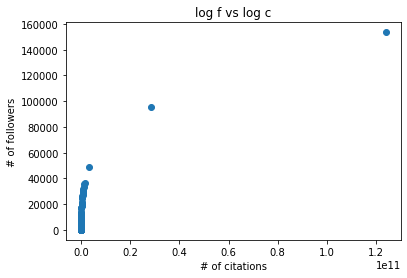

In [ ]:
plt.scatter(c,f)
plt.title("log f vs log c")
plt.xlabel("# of citations")
plt.ylabel("# of followers")
plt.show()

In [ ]:
print(pearsonr(f,c))

(0.7455668903013717, 0.0)


Analysis 1

In [ ]:
k_ind=[]
cit_sc=[]

for i in range(8376):
    fa=df.iat[i,6]
    fc=43.3*pow(df.iat[i,])
    break

16.0


0                                                     NaN
1                            Agile Worker, #agilethatpays
2       MD of @TheOnePoint - IT,Telecoms,Mobile & Digi...
3       Software developer, entrepreneur, likes his bi...
4       Anja Schneider is DJ, producer, radio broadcas...
5       pattern formation, minimal music, granular mat...
6                     •Förvirrad tekniktonåring\n•Liberal
7                                                     NaN
8                                                     NaN
9       Musical composition, production, and performan...
10      Curator, agriculture & fisheries with Ingenium...
11                                                    NaN
12      actrice ... Cours Privé...Death in Paradise......
13                                                    NaN
14      Presenter 🔸 Writer 🔸 Video Producer 🔸 Outside ...
15      NIHR National Director for Dementia Research, ...
16                                                    NaN
17      Pental

In [ ]:
cd H:\Twitter_Project_OBT12\Twitter_Project

H:\Twitter_Project_OBT12\Twitter_Project


In [ ]:
ls

 Volume in drive H is Backup Plus
 Volume Serial Number is 5F2B-FBF0

 Directory of H:\Twitter_Project_OBT12\Twitter_Project

17-03-2020  23:33    <DIR>          .
17-03-2020  23:33    <DIR>          ..
16-03-2020  09:28             6,148 .DS_Store
24-12-2019  07:01        44,425,694 authors_names.csv
13-01-2020  13:53            10,084 domain_bis.xlsx
17-03-2020  23:25         2,225,324 Final_Report_OBT12.pdf
03-12-2020  02:01             1,662 finucla.csv
06-12-2020  00:45             3,943 finucla3.csv
16-03-2020  09:25            20,642 NLP.ipynb
09-03-2020  09:21            45,145 pro_perso.xlsx
17-03-2020  10:46            10,532 scrapping_twitter_data.py
12-03-2020  14:21           759,157 sentiment_analysis.xlsx
16-03-2020  10:36       118,812,941 twitter_info_total_final_1.xlsx
16-03-2020  10:52       123,025,390 twitter_info_total_final_2.xlsx
16-03-2020  11:03       130,697,663 twitter_info_total_final_3.xlsx
03-12-2020  00:01            16,948 ucla.csv
              14 File